# Q1: Write a python program to scrape data for “Data Analyst” Job position in “Bangalore” location. 

Import the required libraries

In [263]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.common.by import By
import time

Access the chrome driver using download location.

In [264]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")

Get the url of website

In [265]:
driver.get("https://www.naukri.com/")

Send "Data Analyst" text to search.

In [266]:
designation=driver.find_element(By.CLASS_NAME,"suggestor-input")
designation.send_keys("Data Analyst")

Choose Location "Bangalore"

In [267]:
location=driver.find_element(By.XPATH,"/html/body/div[1]/div[6]/div/div/div[5]/div/div/div/input")
location.send_keys("Bangalore")

Use the Search button to get results.

In [268]:
search=driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()

First create set[] to store the extracted data and then use loops to extract the required information from the webpage. The number of set = number of columns required in dataframe.

In [269]:
job_title=[]
job_location=[]
company_name=[]
experience_required=[]


In [270]:
title_tags=driver.find_elements(By.XPATH,'//a[@class="title fw500 ellipsis"]')
for i in title_tags[0:10]:
    title=i.text
    job_title.append(title)
    
location_tags=driver.find_elements(By.XPATH,'//li[@class="fleft grey-text br2 placeHolderLi location"]')
for i in location_tags[0:10]:
    location=i.text
    job_location.append(location)
    
company_tags=driver.find_elements(By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in company_tags[0:10]:
    company=i.text
    company_name.append(company)
    
experience_tags=driver.find_elements(By.XPATH,'//li[@class="fleft grey-text br2 placeHolderLi experience"]')
for i in experience_tags[0:10]:
    exp=i.text
    experience_required.append(exp)
    

In [271]:
del job_title[10:]
del job_location[10:]
del company_name[10:]

Remove additional string from experience_required list

In [275]:
exp=[]
for i in experience_required:
    exp.append(i[:-4])
exp

['3-6', '4-8', '2-5', '1-6', '0-4', '3-8', '6-9', '5-10', '3-7', '6-8']

Save the result in Dataframe.

In [276]:
df=pd.DataFrame({'Title':job_title,'Location':job_location,'Company':company_name,'Experience':exp})
df.head()

,Title,Location,Company,Experience
0,Senior Data Analyst,"Bangalore/Bengaluru, Chennai",Latentview,3-6
1,Data Analyst,"Bangalore/Bengaluru, Mangaluru/Mangalore, Pune...","Coresight Research, Inc.",4-8
2,Data Analyst,Bangalore/Bengaluru,Varite,2-5
3,Data Analyst - CRM Platform,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",Artech infosystem,1-6
4,Data Analyst,Bangalore/Bengaluru,Jar,0-4


In [107]:
df.shape

(10, 4)

# Q2: Write a python program to scrape data for “Data Scientist” Job position in “Bangalore” location.

In [34]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")

In [35]:
driver.get("https://www.naukri.com/")

Send "Data Scientist" text to search box

In [36]:
designation=driver.find_element(By.CLASS_NAME,"suggestor-input")
designation.send_keys("Data Scientist")

Choose "Bangalore" as location.

In [37]:
location=driver.find_element(By.XPATH,"/html/body/div[1]/div[6]/div/div/div[5]/div/div/div/input")
location.send_keys("Bangalore")

Submit the search.

In [38]:
search=driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()

In [39]:
job_titl=[]
job_locatio=[]
company_nam=[]


Extract the information.

In [40]:
title_tags=driver.find_elements(By.XPATH,'//a[@class="title fw500 ellipsis"]')
for i in title_tags[0:10]:
    title=i.text
    job_titl.append(title)
    
location_tags=driver.find_elements(By.XPATH,'//li[@class="fleft grey-text br2 placeHolderLi location"]')
for i in location_tags[0:10]:
    location=i.text
    job_locatio.append(location)
    
company_tags=driver.find_elements(By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in company_tags[0:10]:
    company=i.text
    company_nam.append(company)
    


In [42]:
df2=pd.DataFrame({'Title':job_titl,'Location':job_locatio,'Company':company_nam})
df2.head()

,Title,Location,Company
0,Data Science Specialist,"Bangalore/Bengaluru, Kolkata, Mumbai, Hyderaba...",Accenture
1,Data Science Manager,"Bangalore/Bengaluru, Kolkata, Mumbai, Hyderaba...",Accenture
2,"Mongodb Database Administrator, Maria DB or Ca...","Bangalore/Bengaluru, Hyderabad/Secunderabad, P...",Mphasis
3,Analystics & Modeling Specialist,"Bangalore/Bengaluru, Kolkata, Mumbai, Hyderaba...",Accenture
4,Assistant Manager - Data Science,"Bangalore/Bengaluru, Mumbai, Pune",CitiusTech


In [106]:
df2.shape

(10, 3)

# Q3: Scrape data on Naukri using the filters available on the webpage

In [277]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.naukri.com/")

Send "Data Scientist" text to search box

In [278]:
designation=driver.find_element(By.CLASS_NAME,"suggestor-input")
designation.send_keys("Data Scientist")

Submit the search

In [279]:
search=driver.find_element(By.CLASS_NAME,"qsbSubmit")
search.click()
driver.implicitly_wait(5)

Using filter (location:Delhi/NCR, Salary:3-5lakh) 

In [280]:
filter_loc=driver.find_element(By.XPATH,"/html/body/div[1]/div[4]/div/section[1]/div[2]/div[5]/div[2]/div[3]/label/i")
filter_loc.click()
driver.implicitly_wait(5)

In [281]:
filter_sal=driver.find_element(By.XPATH,"/html/body/div[1]/div[4]/div/section[1]/div[2]/div[6]/div[2]/div[2]/label/i")
filter_sal.click()

In [282]:
job_tit=[]
job_locati=[]
company_na=[]
sal_na=[]


In [283]:
title_tags=driver.find_elements(By.XPATH,'//a[@class="title fw500 ellipsis"]')
for i in title_tags[0:10]:
    title=i.text
    job_tit.append(title)
    
location_tags=driver.find_elements(By.XPATH,'//li[@class="fleft grey-text br2 placeHolderLi location"]')
for i in location_tags[0:10]:
    location=i.text
    job_locati.append(location)
    
company_tags=driver.find_elements(By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in company_tags[0:10]:
    company=i.text
    company_na.append(company)

salary_tags=driver.find_elements(By.XPATH,'//li[@class="fleft grey-text br2 placeHolderLi salary"]')
for i in salary_tags[0:10]:
    salary=i.text
    sal_na.append(salary)


Remove "PA" from sal_na list

In [287]:
s=[]
for i in sal_na:
    s.append(i[:-3])

In [292]:
df3=pd.DataFrame({'Title':job_tit,'Location':job_locati,'Company':company_na,'Salary PA ₹ ':s})
df3.head()

,Title,Location,Company,Salary PA ₹
0,Data Scientist,"Noida, Nagpur, Bangalore/Bengaluru",GlobalLogic,"3,00,000 - 4,50,000"
1,DigitalBCG GAMMA Data Scientist,"New Delhi, Bangalore/Bengaluru",Boston Consulting Group,Not disclo
2,Data Scientist,Gurgaon/Gurugram,IHS Markit,Not disclo
3,Lead Data Scientist,Noida(Sector-59 Noida)\n(WFH during Covid),R Systems International,Not disclo
4,Data Scientist,Gurgaon/Gurugram,Optum,Not disclo


In [108]:
df3.shape

(10, 4)

# Q4: Scrape data of first 100 sunglasses listings on flipkart.com. 

In [175]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.flipkart.com/")

Search for "Sunglasses"

In [176]:
search_text=driver.find_element(By.CLASS_NAME,"_3704LK")
search_text.send_keys("Sunglasses")
driver.implicitly_wait(5)

Sumbit the search

In [178]:
search=driver.find_element(By.CLASS_NAME,"L0Z3Pu")
search.click()

In [179]:
brand=[]
des=[]
price=[]


In [180]:
start=0
end=3
for page in range(start,end):
    title_tags=driver.find_elements(By.XPATH,'//div[@class="_2WkVRV"]')
    for i in title_tags[0:100]: 
        title=i.text
        brand.append(title)
    
    description_tags=driver.find_elements(By.XPATH,'//a[@class="IRpwTa"]')
    for i in description_tags[0:100]:
        titl=i.text
        des.append(titl) 


    price_tags=driver.find_elements(By.XPATH,'//div[@class="_30jeq3"]')
    for i in price_tags[0:100]:
        ti=i.text
        price.append(ti)
        
    next_button=driver.find_element(By.XPATH,'//a[@class="_1LKTO3"]')
    next_button.click()
    time.sleep(5)


In [183]:
del brand[100:]
del des[100:]
del price[100:]

In [186]:
p=[]
for i in price:
    p.append(i[1:])

In [188]:
df4=pd.DataFrame({'Title':brand,'Description':des,'Price ₹':p})
df4.head()

,Title,Description,Price ₹
0,VINCENT CHASE,"by Lenskart Polarized, UV Protection Cat-eye S...",999
1,SKYZA INDIA,"UV Protection, Mirrored Spectacle Sunglasses (...",399
2,Fastrack,UV Protection Wayfarer Sunglasses (Free Size),799
3,SHAAH COLLECTIONS,UV Protection Round Sunglasses (54),179
4,LIZA ANGEL,UV Protection Wayfarer Sunglasses (Free Size),199


In [109]:
df4.shape

(100, 3)

# Q5: Scrape 100 reviews data from flipkart.com for iphone11 phone.


In [281]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.flipkart.com/")

Send "iphone 11" text to search.

In [282]:
search_text=driver.find_element(By.CLASS_NAME,"_3704LK")
search_text.send_keys("iphone 11")

Submit the search

In [283]:
searching=driver.find_element(By.CLASS_NAME,"L0Z3Pu")
searching.click()

Select the first result appearing in the list of results.

In [284]:
result1=driver.find_element(By.CLASS_NAME,"_4rR01T")
result1.click()

Extract url of text link that states "All Reviews" to get to review page.

In [171]:
link=[]
url=driver.find_elements(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[7]/div/a')
for i in url:
    link.append(i.get_attribute('href'))
link

['https://www.flipkart.com/apple-iphone-11-black-128-gb/product-reviews/itm8244e8d955aba?pid=MOBFWQ6BKRYBP5X8&lid=LSTMOBFWQ6BKRYBP5X8IBG6BS&marketplace=FLIPKART']

In [173]:
for i in link:
    driver.get(i)

In [288]:
rating=[]
rev_s=[]
rev=[]


In [289]:
start=0
end=10
for page in range(start,end):
    rating_tags=driver.find_elements(By.XPATH,'//div[@class="_3LWZlK _1BLPMq"]')
    for i in rating_tags[0:100]:
        title=i.text
        rating.append(title)
    
    summary_tags=driver.find_elements(By.XPATH,'//p[@class="_2-N8zT"]')
    for i in summary_tags[0:100]:
        lo=i.text
        rev_s.append(lo)
    
    review_tags=driver.find_elements(By.XPATH,'//div[@class="t-ZTKy"]')
    for i in review_tags[0:100]:
        co=i.text
        rev.append(co)
    
    next_button=driver.find_element(By.XPATH,'//a[@class="_1LKTO3"]')
    next_button.click()
    time.sleep(5)





In [290]:
df5=pd.DataFrame({'Rating':rating,'Review_Summary':rev_s,'Full_Review':rev})
df5.head()

,Rating,Review_Summary,Full_Review
0,4,Value-for-money,I'm Really happy with the product\nDelivery wa...
1,5,Simply awesome,Really satisfied with the Product I received.....
2,5,Perfect product!,Amazing phone with great cameras and better ba...
3,5,Best in the market!,Great iPhone very snappy experience as apple k...
4,5,Worth every penny,Previously I was using one plus 3t it was a gr...


In [291]:
df5.shape

(100, 3)

# Q6: Scrape data for first 100 sneakers you find when you visit flipkart.com and search for “sneakers” in the search field.....


In [193]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.flipkart.com/")

Search for "sneakers".

In [194]:
search_text=driver.find_element(By.CLASS_NAME,"_3704LK")
search_text.send_keys("sneakers")
driver.implicitly_wait(5)

Submit the search.

In [195]:
searching=driver.find_element(By.CLASS_NAME,"L0Z3Pu")
searching.click()

In [196]:
brand=[]
des=[]
price=[]

start=0
end=3
for page in range(start,end):
    title_tags=driver.find_elements(By.XPATH,'//div[@class="_2WkVRV"]')
    for i in title_tags[0:100]: 
        title=i.text
        brand.append(title)
    
    description_tags=driver.find_elements(By.XPATH,'//a[@class="IRpwTa"]')
    for i in description_tags[0:100]:
        titl=i.text
        des.append(titl) 


    price_tags=driver.find_elements(By.XPATH,'//div[@class="_30jeq3"]')
    for i in price_tags[0:100]:
        ti=i.text
        price.append(ti)
        
    next_button=driver.find_element(By.XPATH,'//a[@class="_1LKTO3"]')
    next_button.click()
    time.sleep(5)



In [197]:
del brand[100:]
del des[100:]
del price[100:]

In [198]:
p=[]
for i in price:
    p.append(i[1:])

In [199]:
df6=pd.DataFrame({'Company':brand,'Description':des,'Price ₹':p})
df6.head()

,Company,Description,Price ₹
0,K- FOOTLANCE,Sneakers For Men,466
1,Labbin,Sneakers For Men,499
2,BRUTON,Modern Trendy Shoes Sneakers For Men,470
3,RED TAPE,Sneakers For Men,"1,499"
4,BRUTON,Lightweight Pack Of 1 Trendy Sneakers Sneakers...,259


In [13]:
df6.shape

(100, 3)

# Q7: Scrape data for first 100 sneakers you find when you visit myntra.com/shoes...


In [210]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.myntra.com/shoes")
driver.implicitly_wait(5)

Select 2nd price option from the filter on left side bar.

In [211]:
new_co=driver.find_element(By.XPATH,"/html/body/div[2]/div/div[1]/main/div[3]/div[1]/section/div/div[6]/ul/li[1]/label/div")
new_co.click()
driver.implicitly_wait(5)

Select black color from filter.

In [212]:
filter_lo=driver.find_element(By.XPATH,"/html/body/div[2]/div/div[1]/main/div[3]/div[1]/section/div/div[5]/ul/li[2]/label/div")
filter_lo.click()

In [213]:
brand_m=[]
des_m=[]
price_m=[]

start=0
end=3
for page in range(start,end):
    title_tags=driver.find_elements(By.XPATH,'//h3[@class="product-brand"]')
    for i in title_tags[0:100]: 
        b_m=i.text
        brand_m.append(b_m)
    
    description_tags=driver.find_elements(By.XPATH,'//h4[@class="product-product"]')
    for i in description_tags[0:100]:
        d_m=i.text
        des_m.append(d_m) 


    price_tags=driver.find_elements(By.XPATH,'//div[@class="product-price"]')
    for i in price_tags[0:100]:
        p_m=i.text
        price_m.append(p_m)
        
    next_button=driver.find_element(By.XPATH,'//li[@class="pagination-next"]')
    next_button.click()
    time.sleep(5)


In [214]:
del brand_m[100:]
del des_m[100:]
del price_m[100:]

Extract price and eliminate rest of the string

In [231]:
p=[]
for i in price_m:
    p.append(i[3:9])
    
b=[] 
for i in p:
    b.append(i.translate({ord(i): None for i in 'R'}))

In [232]:
df7=pd.DataFrame({'Company':brand_m,'Description':des_m,'Price ₹':b})
df7.head()

,Company,Description,Price ₹
0,Skechers,Men Go Walk Walking Shoes,6374
1,Skechers,Men GO WALK - TERRA Shoes,8499
2,Puma,Men Fuse 2.0 Training Shoes,6399
3,ADIDAS,Men 4DFWD_Pulse Running Shoes,11199
4,Skechers,Men Go Run Hyper Burst Running,7224


In [78]:
df7.shape

(100, 3)

# Q8: Go to webpage ... Enter “Laptop” in the search field and then click the search icon....


In [134]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.amazon.in/")

Search "Laptop".

In [135]:
search_text=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
search_text.send_keys("Laptop")

Submit the search.

In [136]:
search=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search.click()
driver.implicitly_wait(5)

Select i7 processor from left side bar filter.

In [137]:
filte=driver.find_element(By.XPATH,"//span[text()='Intel Core i7']")
filte.click()


The displayed list of items in result has rating in an 5 star icon format which cannot be captured. Hence we fetch url of all the images of product on the list, then open each product page to get the required information.

In [138]:
u=[]

Get url of all the product.

In [139]:
url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
end=30
start=1
for i in url[start:end]:
    u.append(i.get_attribute('href'))

In [140]:
a=[]
b=[]
c=[]
         

-variable s finds product name element

-variable n finds product price element

-variable nn finds product price element from different location (Incase variable n element is not available on the page as seen for some of the product pages).

-variable z finds product rating 

-variable zz finds if no product rating exists (text) element

In [141]:
for i in u:
    driver.get(i)
    s=driver.find_elements(By.XPATH,'//span[@class="a-size-large product-title-word-break"]')
    for i in s:
        v=i.text
        a.append(v)
        
        n=driver.find_elements(By.XPATH,'//span[@class="a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]')
        for i in n[0:1]:
            z=i.text
            b.append(z)
            
        nn=driver.find_elements(By.XPATH,'//td[@class="a-span12"]')
        for i in nn:    
            b.append(i.text)

   
        z=driver.find_elements(By.XPATH,'//div[@class="a-fixed-left-grid AverageCustomerReviews a-spacing-small"]')
        for i in z:
            c.append(i.text)
            
        zz=driver.find_elements(By.XPATH,'//h3[@class="a-spacing-small"]')
        for i in zz:
            c.append(i.text)

          
        


In [142]:
print(len(a),len(b),len(c))

29 29 33


We separate unnecessary text appended with rating, thus reducing the length of list c.

In [152]:
d=[]
for i in c:
    if i[0].isdigit():  
        d.append(i) 
    elif i=='No customer reviews':
        d.append(i)
        
print(len(d))

29


We eliminate uncessary text (symbol of currency) appended with price tag.

In [162]:
e=[]
for i in b:
    if len(i)>9:
        e.append(i[1:-16])
    else:
        e.append(i[1:])

print(len(e))             

29


In [164]:
df=pd.DataFrame({"Product":a,"Price":e,"Ratings":d})
df.head()

,Product,Price,Ratings
0,"ASUS Vivobook 15, 15.6-inch (39.62 cms) FHD, I...","64,990",3.7 out of 5
1,"Fujitsu UH-X 11th Gen Intel Core i7 13.3"" FHD ...","1,00,00",4.2 out of 5
2,"ASUS Zenbook 13 OLED, 13.3-inch (33.78 cms) FH...","93,290",4.2 out of 5
3,Lenovo IdeaPad Slim 5 Intel Core i7 12th Gen 1...,"79,99",4.4 out of 5
4,"ASUS Vivobook 15, 15.6-inch (39.62 cms) FHD, I...","64,990",3.7 out of 5


In [158]:
df.shape

(29, 3)

# Q9: Write a python program to scrape data for first 10 job results for Data Scientist Designation in Noida....

In [250]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.ambitionbox.com/")
driver.implicitly_wait(5)

Select job from webpage header menu.

In [252]:
designation=driver.find_element(By.XPATH,"/html/body/div/div/div/div[1]/header/nav/ul/li[5]/a")
designation.click()
driver.implicitly_wait(5)

Search "Data Scientist"

In [253]:
designation2=driver.find_element(By.XPATH,"/html/body/div/div/div/div[2]/div[1]/div[1]/div/div/div/div/span/input")
designation2.send_keys("Data Scientist")

Submit the search.

In [116]:
designation3=driver.find_element(By.XPATH,"/html/body/div/div/div/div[2]/div[1]/div[1]/div/div/div/button")
designation3.click()
driver.implicitly_wait(5)

Select "Location" drop menu.

In [117]:
designation4=driver.find_element(By.XPATH,"/html/body/div/div/div/div[2]/div[1]/div[2]/div[1]/div/div/div/div[2]/div[1]/i")
designation4.click()

Search "Noida".

In [118]:
designation5=driver.find_element(By.XPATH,"/html/body/div/div/div/div[2]/div[1]/div[2]/div[1]/div/div/div/div[2]/div[2]/div/div[2]/input")
designation5.send_keys("Noida")

Submit the search

In [120]:
designation6=driver.find_element(By.XPATH,"/html/body/div/div/div/div[2]/div[1]/div[2]/div[1]/div/div/div/div[2]/div[2]/div/div[3]/div[1]/div[1]/div/label")
designation6.click()

In [239]:
name=[]
d_posted=[]
rating=[]


Cannot be solved further as selenium browser denies access to rate(sign-in) page.

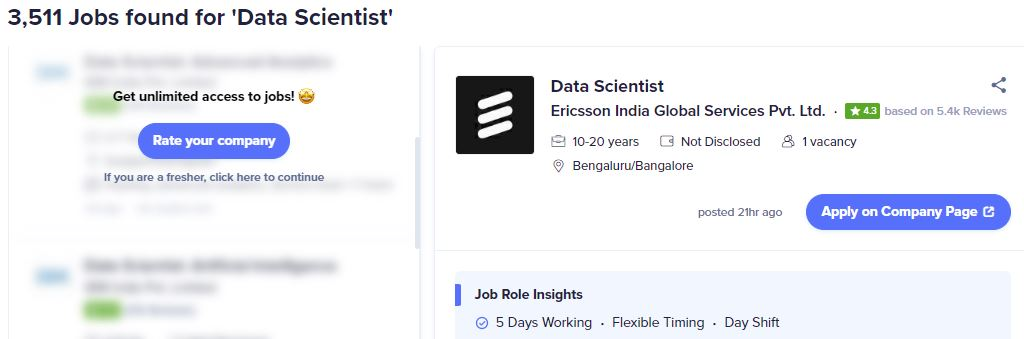

# Q10: Write a python program to scrape the salary data for Data Scientist designation....

In [293]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.ambitionbox.com/")

We first go to the job option located in the header menu of the website.

In [294]:
designation=driver.find_element(By.XPATH,"/html/body/div/div/div/div[1]/header/nav/ul/li[3]/i")
designation.click()
driver.implicitly_wait(5)

We then move to search box on the salary page.

In [295]:
designation2=driver.find_element(By.XPATH,"/html/body/div/div/div/div[1]/header/nav/ul/li[3]/div/ul/li[1]/div/div[2]/a")
designation2.click()
driver.implicitly_wait(5)

We enter Data Scientist in search box and search for result.

In [296]:
search=driver.find_element(By.XPATH,"/html/body/div/div/div/main/section[1]/div[2]/div[1]/span/input")
search.send_keys("Data Scientist")
se=driver.find_element(By.XPATH,'/html/body/div/div/div/main/section[1]/div[2]/div[1]/i[2]')
se.click()
driver.implicitly_wait(5)

In [297]:
search.send_keys("Data Scientist")
select=driver.find_element(By.XPATH,'/html/body/div/div/div/main/section[1]/div[2]/div[1]/span/div/div/div[1]')
select.click()

In [298]:
name=[]
min_sal=[]
avg_sal=[]
exp=[]

Extract the information.

In [299]:

    name_tag=driver.find_elements(By.XPATH,'//div[@class="company-info"]')
    for i in name_tag:
        n=i.text
        name.append(n)
    
    min_s=driver.find_elements(By.XPATH,'//div [@class="value body-medium"]')
    for i in min_s:
        ms=i.text
        min_sal.append(ms)
    
    avg_s=driver.find_elements(By.XPATH,'//p[@class="averageCtc"]')
    for i in avg_s:
        avgs=i.text
        avg_sal.append(avgs)
    
    
    exp_tag=driver.find_elements(By.XPATH,'//div[@class="sbold-list-header"]')
    for i in exp_tag:
        ep=i.text
        exp.append(ep)

In [300]:
min_sal

['₹ 25.0L',
 '₹ 45.0L',
 '₹ 15.0L',
 '₹ 26.0L',
 '₹ 11.0L',
 '₹ 22.6L',
 '₹ 11.0L',
 '₹ 22.0L',
 '₹ 9.0L',
 '₹ 23.0L',
 '₹ 12.7L',
 '₹ 19.7L',
 '₹ 9.0L',
 '₹ 20.0L',
 '₹ 11.0L',
 '₹ 20.0L',
 '₹ 12.0L',
 '₹ 18.0L',
 '₹ 8.8L',
 '₹ 17.5L']

Remove currency symbol

In [301]:
m_s=[]
for i in min_sal:
    m_s.append(i[2:-1])

The above list contains min and max salary in alternate order. We use loop to get two list, one for min salary and other for max salary. 

In [302]:
max_salary=[]
min_salary=[]
for i in range(len(m_s)):
    if (i%2)==0:
        max_salary.append(m_s[i])
    else:
        min_salary.append(m_s[i])


In [303]:
avg_sal

['₹ 32.2L',
 '₹ 19.8L',
 '₹ 16.4L',
 '₹ 15.9L',
 '₹ 15.5L',
 '₹ 14.7L',
 '₹ 14.6L',
 '₹ 14.5L',
 '₹ 14.0L',
 '₹ 13.9L']

Remove the currency symbol

In [304]:
a_s=[]
for i in avg_sal:
    a_s.append(i[2:-1])
a_s

['32.2',
 '19.8',
 '16.4',
 '15.9',
 '15.5',
 '14.7',
 '14.6',
 '14.5',
 '14.0',
 '13.9']

In [305]:
name

['Walmart\nData Scientist Salary\n3-4 yrs experience (based on 24 salaries)',
 'Ab Inbev\nData Scientist Salary\n2-4 yrs experience (based on 59 salaries)',
 'Optum\nData Scientist Salary\n2-4 yrs experience (based on 49 salaries)',
 'ZS\nData Scientist Salary\n1-2 yrs experience (based on 35 salaries)',
 'Fractal Analytics\nData Scientist Salary\n2-4 yrs experience (based on 118 salaries)',
 'Sigmoid Analytics\nData Scientist Salary\n1 yr experience (based on 10 salaries)',
 'Tiger Analytics\nData Scientist Salary\n2-4 yrs experience (based on 70 salaries)',
 'Legato Health Technologies\nData Scientist Salary\n4 yrs experience (based on 11 salaries)',
 'HSBC\nData Scientist Salary\n4 yrs experience (based on 10 salaries)',
 'Tredence\nData Scientist Salary\n3 yrs experience (based on 14 salaries)',
 'TCS\n3.1\nSalary Rating \n46.2k reviews',
 'Accenture\n3.7\nSalary Rating \n31.3k reviews',
 'Cognizant\n3.4\nSalary Rating \n28.4k reviews',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


We clean the above list to extract only the required company name, located at starting of each element.

In [306]:
import numpy as np
b=[]
for i in name:
    c=i.split()
    b.append(c[0:1])
    
d=[]
for i in b:
    for j in i:
        d.append(j)
        

del d[10:]
d

['Walmart',
 'Ab',
 'Optum',
 'ZS',
 'Fractal',
 'Sigmoid',
 'Tiger',
 'Legato',
 'HSBC',
 'Tredence']

In [307]:
exp

['3-4 yrs experience (based on 24 salaries)',
 '2-4 yrs experience (based on 59 salaries)',
 '2-4 yrs experience (based on 49 salaries)',
 '1-2 yrs experience (based on 35 salaries)',
 '2-4 yrs experience (based on 118 salaries)',
 '1 yr experience (based on 10 salaries)',
 '2-4 yrs experience (based on 70 salaries)',
 '4 yrs experience (based on 11 salaries)',
 '4 yrs experience (based on 10 salaries)',
 '3 yrs experience (based on 14 salaries)']

We clean the above list to extract only the required experience, located at starting of each element.

In [308]:
z=[]
for j in exp:
    c=j.split()
    z.append(c[0:1])
              
e=[]
for i in z:
    for j in i:
        e.append(j)
e

['3-4', '2-4', '2-4', '1-2', '2-4', '1', '2-4', '4', '4', '3']

In [311]:
df9=pd.DataFrame({"Company Name":d,"Min Salary (Lakh/PA) ₹":min_salary,"Average Salary (Lakh/PA) ₹":a_s,"Max Saalary (Lakh/PA) ₹":max_salary,"Experience":e})
df9.head()

,Company Name,Min Salary (Lakh/PA) ₹,Average Salary (Lakh/PA) ₹,Max Saalary (Lakh/PA) ₹,Experience
0,Walmart,45.0,32.2,25.0,3-4
1,Ab,26.0,19.8,15.0,2-4
2,Optum,22.6,16.4,11.0,2-4
3,ZS,22.0,15.9,11.0,1-2
4,Fractal,23.0,15.5,9.0,2-4


In [310]:
df9.shape

(10, 5)